In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_test = "/Users/priyanshpatel/Desktop/codsoft/Genre Classification Dataset 2/test_data.txt"
df_test = pd.read_csv(df_test, sep=':::', names=['Movie_name', 'Describe'])
df_test.head()

/var/folders/64/m_40qk0x1s5g07xxhjly0qp00000gn/T/ipykernel_12804/1752171336.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test = pd.read_csv(df_test, sep=':::', names=['Movie_name', 'Describe'])


,Movie_name,Describe
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [3]:
df = "/Users/priyanshpatel/Desktop/codsoft/Genre Classification Dataset 2/train_data.txt"
df = pd.read_csv(df, sep=':::', names=['Movie_name', 'Genre', 'Describe'])
df.head()

/var/folders/64/m_40qk0x1s5g07xxhjly0qp00000gn/T/ipykernel_12804/1742307282.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(df, sep=':::', names=['Movie_name', 'Genre', 'Describe'])


,Movie_name,Genre,Describe
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
df.isnull().sum()

Movie_name    0
Genre         0
Describe      0
dtype: int64

In [5]:
df['Genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

<Axes: xlabel='Genre'>

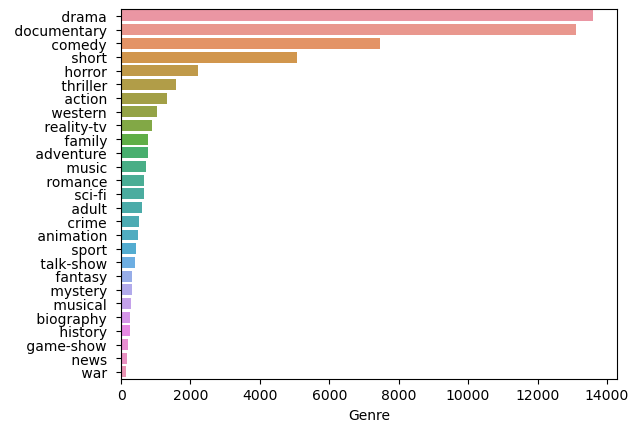

In [6]:
countss= df['Genre'].value_counts()
sns.barplot(x=countss, y=countss.index)

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
def text_clean(arg):
  review = re.sub('[^a-zA-Z]',' ',arg)
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  text = ' '.join(review)
  corpus.append(text)

df['Cleaned'] = df['Describe'].apply(text_clean)

corpus[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/priyanshpatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['listen convers doctor parent year old oscar learn nobodi courag tell week live furiou refus speak anyon except straight talk rose ladi pink meet hospit stair christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue',
 'brother sister past incestu relationship current murder relationship murder women reject murder women get close',
 'bu empti student field trip museum natur histori littl tour guid suspect student anoth tour first lectur film co drift dream erot fantasi one imagin film releas emot fantasi erot uncommon way one slip curat offic littl acquisit anoth find anthropologist see bone identifi even head teacher immun soon tour bu depart everyon admit quit educ',
 'help unemploy father make end meet edith twin sister grace work seamstress invalid grace fall prey temptat chinatown opium becom addict condit worsen misguid physician prescrib morphin eas pain 

In [8]:
len(corpus)

54214

In [9]:
df.shape

(54214, 4)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [11]:
X= tfidf_vectorizer.fit_transform(corpus)

In [12]:
y = df['Genre'].values

In [13]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X, y)

MultinomialNB()